# Dissertation Analysis Part 1

Mapping disparity focussing on four metrics:
- [IMD](https://dclgapps.communities.gov.uk/imd/iod_index.html) [2015](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015) and [2019](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019)
- [GVA(£)](https://www.ons.gov.uk/economy/grossvalueaddedgva/datasets/regionalgrossvalueaddedbalancedbylocalauthorityintheuk)
- [AHAH](https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah)
- [Wider Determinants of Health](https://fingertips.phe.org.uk/profile/wider-determinants/supporting-information/built-and-natural-environment)

### Importing Packages and Defining Functions

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay
import datetime
import pysal as ps
from pysal.contrib.viz import mapping as maps
import mapclassify.classifiers as classifiers


import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN
from sklearn.metrics import r2_score

from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt



import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

#visualisation set
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

from IPython.display import HTML


C:\Users\Yasmine Hujair\anaconda32020\envs\Dissertation\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\Users\Yasmine Hujair\anaconda32020\envs\Dissertation\lib\site-packages\pysal\contrib\viz\mapping.py:32: UserWarning: Bokeh not installed. Functionality related to it will not work
  warn('Bokeh not installed. Functionality '


In [2]:
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

## Reading in Data

##### Index of Multiple Deprivation
England

In [3]:
#Index of Multiple Deprivation 2019 (England)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/IMD2019.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

In [ ]:
#Index of Multiple Deprivation 2015 (England)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/IMD2015.csv'
# Read in data from github
IMD15 = pd.read_csv(url, low_memory=False)

In [ ]:
#Index of Multiple Deprivation 2010 (England)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/IMD2010.csv'
# Read in data from github
IMD15 = pd.read_csv(url, low_memory=False)

In [ ]:
#Index of Multiple Deprivation 2007 (England)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/IMD2007.csv'
# Read in data from github
IMD15 = pd.read_csv(url, low_memory=False)

Wales

In [ ]:
#Index of Multiple Deprivation 2019 (Wales)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/WIMD2019.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

In [ ]:
#Index of Multiple Deprivation 2015 (Wales)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/WIMD2019.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

In [ ]:
#Index of Multiple Deprivation 2010 (Wales)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/WIMD2019.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

In [ ]:
#Index of Multiple Deprivation 2007 (Wales)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/WIMD2019.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

Scotland

In [ ]:
#Index of Multiple Deprivation 2019 (Scotland)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/SIMD2020.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

In [ ]:
#Index of Multiple Deprivation 2015 (Wales)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/WIMD2015.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

Gross Value Added (GVA)

In [5]:
#Gross Value Added 
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/GVA-per-head.csv'
# Read in data from github
GVAph = pd.read_csv(url, low_memory=False)

Gross Domestic Product (GDP)

In [6]:
#Gross Domestic Product
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/GDP.csv'
# Read in data from github
GDP = pd.read_csv(url, low_memory=False)

In [7]:
#Access to Healthy Assets and Hazards (AHAH)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/AHAH.csv'
# Read in data from github
AHAH = pd.read_csv(url, low_memory=False)

In [8]:
# Read in data locally
BABI = pd.read_csv('BABIData/BABIcompletedates.csv', low_memory=False)
BABI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107011 entries, 0 to 107010
Data columns (total 56 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Barbour ref       107011 non-null  int64  
 1   Long              104029 non-null  float64
 2   Lat               104029 non-null  float64
 3   Project Link ID   8391 non-null    float64
 4   Start Date        107011 non-null  object 
 5   Finish date       107011 non-null  object 
 6   Govt Region       90945 non-null   object 
 7   Primary category  107011 non-null  object 
 8   Primary sector    107011 non-null  object 
 9   ECMR Sector       107011 non-null  object 
 10  Title             107010 non-null  object 
 11  Site1             106613 non-null  object 
 12  Site2             84241 non-null   object 
 13  Site3             104507 non-null  object 
 14  Site4             106852 non-null  object 
 15  Pcode             106866 non-null  object 
 16  Value             10

In [9]:
# Read in data locally
BABI_startdates = pd.read_csv('BABIData/BABIstartdates.csv', low_memory=False)

epsg:27700


<AxesSubplot:>

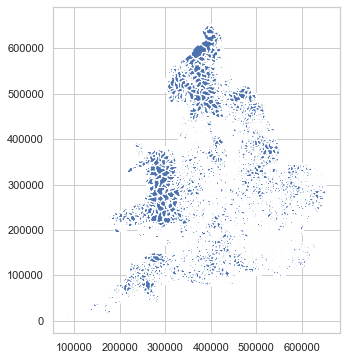

In [40]:
#Read in LSOA boundaries shapefile (local) downloadable from https://geoportal.statistics.gov.uk/datasets/lower-layer-super-output-areas-december-2011-boundaries-full-clipped-bfc-ew-v3?geometry=-23.080%2C50.522%2C18.734%2C55.161
lsoas = gpd.read_file(os.path.join('Buildbackbetter','Data','LSOA-boundaries','Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Clipped__BFC__EW_V3.shp'))
#checking projection
print(lsoas.crs)
lsoas.plot()

In [ ]:
#Read in Scotland boundaries shapefile (local) downloadable from https://data.gov.uk/dataset/ab9f1f20-3b7f-4efa-9bd2-239acf63b540/data-zone-boundaries-2011
dzs = gpd.read_file(os.path.join('Buildbackbetter','Data','DataZone-boundaries-Scotland','SG_DataZone_Bdry_2011.shp'))
#checking projection
print(dzs.crs)
dzs.plot()

In [12]:
#Read in LSOA centroids shapefile (local) downloadable from https://geoportal.statistics.gov.uk/datasets/lower-layer-super-output-areas-december-2011-boundaries-full-clipped-bfc-ew-v3?geometry=-23.080%2C50.522%2C18.734%2C55.161
lsoas_centroids = gpd.read_file(os.path.join('Buildbackbetter','Data','LSOA-weighted-centroids','Lower_Layer_Super_Output_Areas_(December_2001)_Population_Weighted_Centroids.shp'))
#checking projection
print(lsoas_centroids.crs)

epsg:27700


## Data Wrangling

#### Sociodemographic Measures

In [13]:
#Sorting out IMD
IMD = IMD19.merge(IMD15, how='left', on = 'LSOA code (2011)', suffixes = ('19','15'))
IMD.drop(['LSOA name (2011)19','Local Authority District code (2019)','Local Authority District name (2019)'], axis=1, inplace = True)
IMD.rename(columns = {'Index of Multiple Deprivation (IMD) Rank' : 'IMD Rank 2019', 'Index of Multiple Deprivation (IMD) Decile' : 'IMD Decile 2019',
                     'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)':'IMD Rank 2015', 'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'IMD Decile 2015',
                     'LSOA name (2011)15' : 'LSOA Name', 'Local Authority District code (2013)' : 'LA Code', 'Local Authority District name (2013)': 'LA Name'}, inplace = True)
IMD.head()

,LSOA code (2011),IMD Rank 2019,IMD Decile 2019,LSOA Name,LA Code,LA Name,IMD Rank 2015,IMD Decile 2015
0,E01000001,29199,9,City of London 001A,E09000001,City of London,29111,9
1,E01000002,30379,10,City of London 001B,E09000001,City of London,28855,9
2,E01000003,14915,5,City of London 001C,E09000001,City of London,14621,5
3,E01000005,8678,3,City of London 001E,E09000001,City of London,10285,4
4,E01000006,14486,5,Barking and Dagenham 016A,E09000002,Barking and Dagenham,12345,4


In [14]:
#merging public datasets, renamining columns and perfecting data types
df = IMD.merge(AHAH, how = 'left', left_on = 'LSOA code (2011)', right_on = 'lsoa11')
df.drop(['r_rank','h_rank', 'g_rank', 'e_rank', 'r_exp', 'h_exp', 'g_exp', 'e_exp', 'r_dec', 'h_dec', 'g_dec', 'e_dec','lsoa11'], axis=1, inplace = True)
df.rename(columns = {'r_ahah':'AHAH Rank', 'd_ahah':'AHAH Decile', 'ahah':'AHAH'}, inplace = True)
df.head()

,LSOA code (2011),IMD Rank 2019,IMD Decile 2019,LSOA Name,LA Code,LA Name,IMD Rank 2015,IMD Decile 2015,AHAH,AHAH Rank,AHAH Decile
0,E01000001,29199,9,City of London 001A,E09000001,City of London,29111,9,50.13,41713,10
1,E01000002,30379,10,City of London 001B,E09000001,City of London,28855,9,47.89,41647,10
2,E01000003,14915,5,City of London 001C,E09000001,City of London,14621,5,45.21,41419,10
3,E01000005,8678,3,City of London 001E,E09000001,City of London,10285,4,46.64,41564,10
4,E01000006,14486,5,Barking and Dagenham 016A,E09000002,Barking and Dagenham,12345,4,36.80,39464,10


In [15]:
#create geodataframe
gdf = df.merge(lsoas, how='left', left_on = 'LSOA code (2011)', right_on = 'LSOA11CD')
gdf = gpd.GeoDataFrame(gdf, crs = "epsg:27700")
gdf.head()

,LSOA code (2011),IMD Rank 2019,IMD Decile 2019,LSOA Name,LA Code,LA Name,IMD Rank 2015,IMD Decile 2015,AHAH,AHAH Rank,...,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Are,Shape__Len,geometry
0,E01000001,29199,9,City of London 001A,E09000001,City of London,29111,9,50.13,41713,...,E01000001,City of London 001A,532123,181632,-0.10,51.52,"2,635.77","129,865.31","2,635.77","POLYGON ((532151.537 181867.433, 532152.500 18..."
1,E01000002,30379,10,City of London 001B,E09000001,City of London,28855,9,47.89,41647,...,E01000002,City of London 001B,532480,181715,-0.09,51.52,"2,707.88","228,419.63","2,707.88","POLYGON ((532634.497 181926.016, 532632.048 18..."
2,E01000003,14915,5,City of London 001C,E09000001,City of London,14621,5,45.21,41419,...,E01000003,City of London 001C,532239,182033,-0.10,51.52,"1,224.64","59,054.35","1,224.64","POLYGON ((532153.703 182165.155, 532158.250 18..."
3,E01000005,8678,3,City of London 001E,E09000001,City of London,10285,4,46.64,41564,...,E01000005,City of London 001E,533581,181283,-0.08,51.51,"2,275.81","189,577.71","2,275.81","POLYGON ((533619.062 181402.364, 533639.868 18..."
4,E01000006,14486,5,Barking and Dagenham 016A,E09000002,Barking and Dagenham,12345,4,36.80,39464,...,E01000006,Barking and Dagenham 016A,544994,184274,0.09,51.54,"1,966.09","146,537.00","1,966.09","POLYGON ((545126.852 184310.838, 545145.213 18..."


<AxesSubplot:>

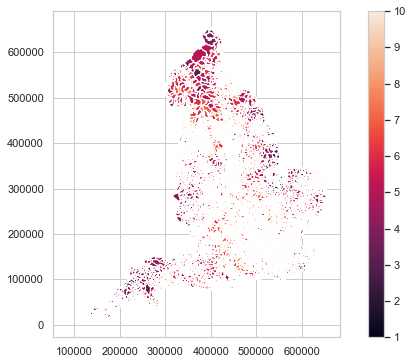

In [16]:
#map 
fig, ax = plt.subplots(1,1)

gdf.plot(column = 'IMD Decile 2015',
        ax=ax, 
        legend=True)

#### Barbour ABI Data

In [17]:
#Convert ints to dates and create a 'year' column
#BABI['Start Date'] = pd.to_datetime(BABI['Start Date'],format='%Y%m%d')
BABI['Start Year'] = pd.DatetimeIndex(BABI['Start Date']).year
BABI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107011 entries, 0 to 107010
Data columns (total 57 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Barbour ref       107011 non-null  int64  
 1   Long              104029 non-null  float64
 2   Lat               104029 non-null  float64
 3   Project Link ID   8391 non-null    float64
 4   Start Date        107011 non-null  object 
 5   Finish date       107011 non-null  object 
 6   Govt Region       90945 non-null   object 
 7   Primary category  107011 non-null  object 
 8   Primary sector    107011 non-null  object 
 9   ECMR Sector       107011 non-null  object 
 10  Title             107010 non-null  object 
 11  Site1             106613 non-null  object 
 12  Site2             84241 non-null   object 
 13  Site3             104507 non-null  object 
 14  Site4             106852 non-null  object 
 15  Pcode             106866 non-null  object 
 16  Value             10

## Infrastructure Data

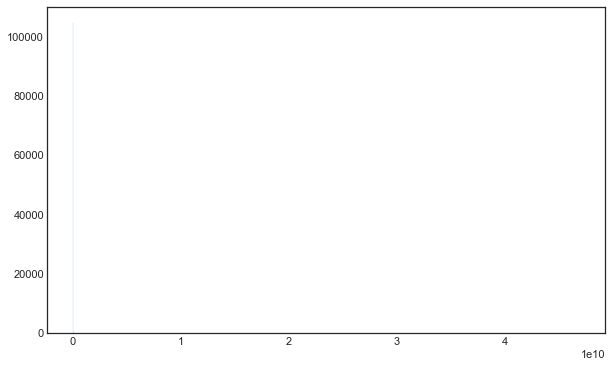

In [18]:
# histogram of value of each project

plt.style.use('seaborn-white')

Values = BABI['Value']

plt.hist(Values, alpha=0.5, bins=1000,
         histtype='stepfilled', color='steelblue');

In [19]:
# density plot of value of project

Values = BABI[['Value','Barbour ref']]

#sort values
Values.sort_values(by=['Value'],ascending=False, inplace=True)
Values.reset_index(inplace = True)      #reset index  


#create index column
Values['index'] = Values.index


#summary stats
Values.describe()


C:\Users\Yasmine Hujair\anaconda32020\envs\Dissertation\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yasmine Hujair\anaconda32020\envs\Dissertation\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,index,Value,Barbour ref
count,"107,011.00","106,655.00","107,011.00"
mean,"53,505.00","7,303,650.83","11,669,767.35"
std,"30,891.56","181,350,813.10","717,320.43"
min,0.00,0.00,"10,053,509.00"
25%,"26,752.50","250,000.00","10,844,437.00"
50%,"53,505.00","579,000.00","11,949,494.00"
75%,"80,257.50","2,000,000.00","12,234,147.00"
max,"107,010.00","47,000,000,000.00","12,564,596.00"


[None]

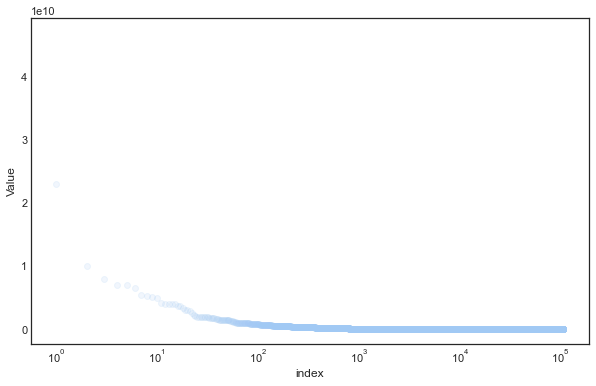

In [20]:
#plot the graph with log scale
splot = sns.regplot(x="index", y="Value", 
                    scatter_kws={'alpha':0.15},
                    data=Values, fit_reg=False)
splot.set(xscale="log")

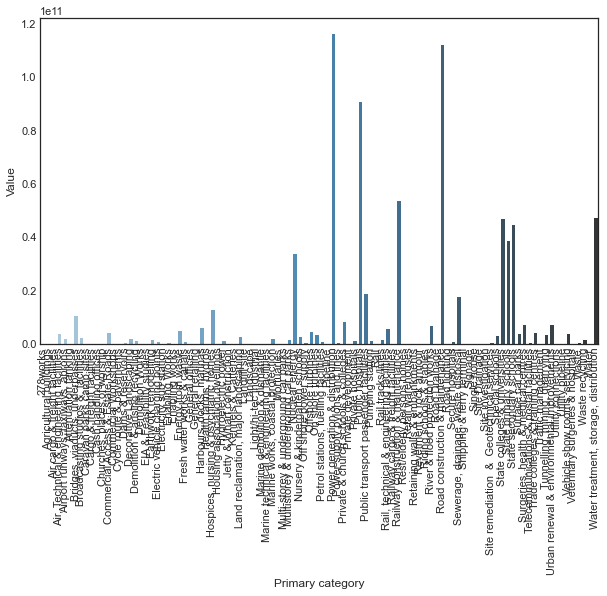

In [21]:
# proportions of value in each category
BABIsector = BABI.groupby(by = 'Primary category').sum()
BABIsector.reset_index(inplace = True)

#graph of value
ax = sns.barplot(y="Value", x= 'Primary category', data=BABIsector,
                 palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

None

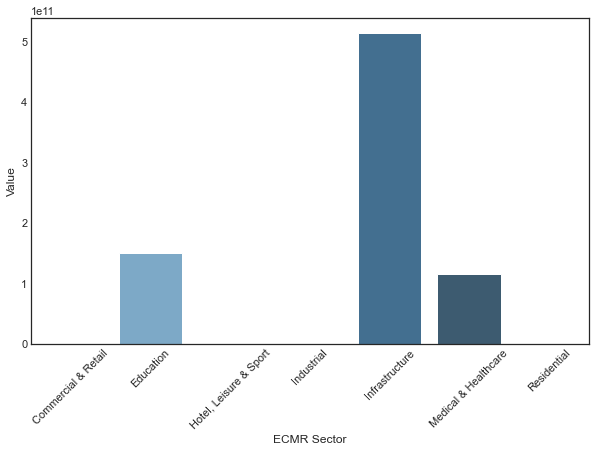

In [22]:
# proportions of value in each ECMR sector
BABIsector = BABI.groupby(by = 'ECMR Sector').sum()
BABIsector.reset_index(inplace = True)

#graph of value
ax = sns.barplot(y="Value", x="ECMR Sector", data=BABIsector,
                 palette="Blues_d")
plt.xticks(rotation=45)

None

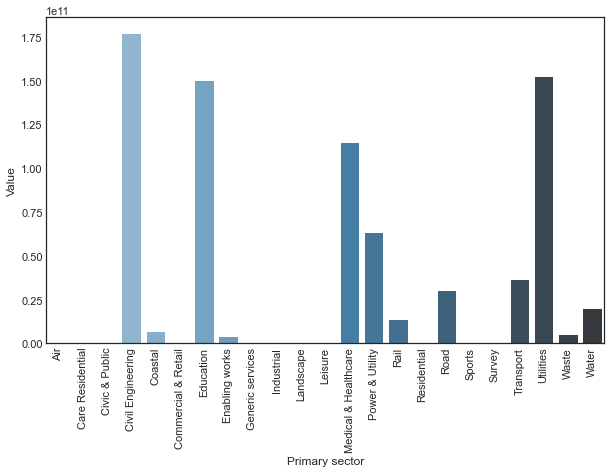

In [23]:
# proportions of value in each primary sector
BABIsector = BABI.groupby(by = 'Primary sector').sum() #overwriting variable for selected sector type
BABIsector.reset_index(inplace = True)

#graph of value
ax = sns.barplot(y="Value", x="Primary sector", data=BABIsector,
                 palette="Blues_d")

plt.xticks(rotation=90)

None

In [24]:
# create geodataframe from BABI data and reproject
BABIgdf = gpd.GeoDataFrame(
    BABI, geometry=gpd.points_from_xy(BABI.Long, BABI.Lat, crs='epsg:4326'))

BABIgdf = BABIgdf.to_crs('epsg:27700')

In [25]:
# spatial join with lsoas
BABIgdflsoas = gpd.sjoin(BABIgdf, lsoas, op='within', how='left')
print(BABIgdflsoas.columns.values)

['Barbour ref' 'Long' 'Lat' 'Project Link ID' 'Start Date' 'Finish date'
 'Govt Region' 'Primary category' 'Primary sector' 'ECMR Sector' 'Title'
 'Site1' 'Site2' 'Site3' 'Site4' 'Pcode' 'Value' 'Scheme' 'Contract'
 'Framework' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022'
 '2023' '2024' '2025' '2026' '2027' '2028' '2029' '2030' 'Start Year'
 'geometry' 'index_right' 'OBJECTID' 'LSOA11CD' 'LSOA11NM' 'BNG_E' 'BNG_N'
 'LONG_' 'LAT' 'Shape_Leng' 'Shape__Are' 'Shape__Len']


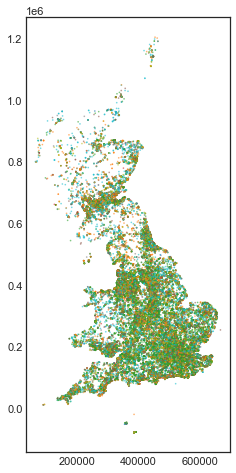

In [26]:
#map the sectors
ax = BABIgdflsoas.plot(column='Primary sector', markersize=0.5, alpha=0.5, figsize=(10,8))
lsoas.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0);
#add legend

KeyboardInterrupt: 

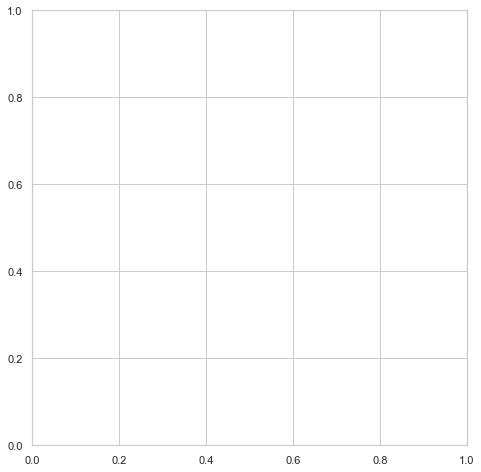

In [36]:
#map the sectors
BABIgdflsoas.plot(column='Value', cmap = 'plasma', scheme ='FisherJenks', markersize=0.5, alpha=0.5, legend=True, figsize=(10,8));

In [28]:
#look at spending per lsoa and check correlations with socioeconomic indicators

#group by lsoa code (sum)
spending = BABIgdflsoas.groupby(by = 'LSOA11CD').sum()
spending.reset_index(inplace = True)

#merge with lsoas so that 0 spending per lsoa is 0
spending = lsoas.merge(spending, how='left', on = 'LSOA11CD')

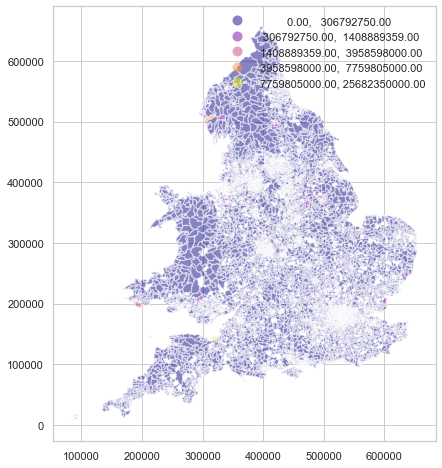

In [37]:
#map the sectors
spending.plot(column='Value', cmap = 'plasma', scheme ='FisherJenks', markersize=0.5, alpha=0.5, legend=True, figsize=(10,8));

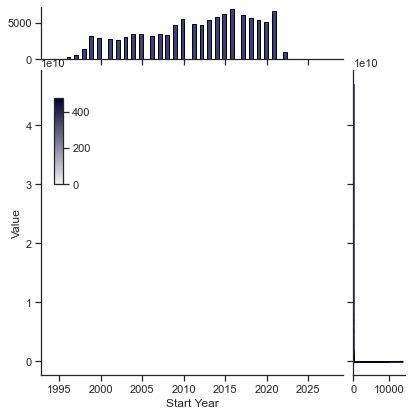

In [30]:
sns.set_theme(style="ticks")
g = sns.JointGrid(data=BABI, y='Value', x='Start Year', marginal_ticks=True)


# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

## Time Series

### Spending per Year

In [31]:
BABI

,Barbour ref,Long,Lat,Project Link ID,Start Date,Finish date,Govt Region,Primary category,Primary sector,ECMR Sector,...,2023,2024,2025,2026,2027,2028,2029,2030,Start Year,geometry
0,10213709,0.50,51.25,NaN,01/06/1995,30/09/1998,NaN,Road construction & maintenance,Civil Engineering,Infrastructure,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1995,POINT (0.49993 51.24685)
1,10225114,-2.26,53.39,NaN,01/01/1996,01/04/1998,NaN,"Air, Technical & engineering facilities",Transport,Infrastructure,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1996,POINT (-2.25970 53.38570)
2,10233373,-1.31,51.39,NaN,01/01/1996,01/01/1997,NaN,Private hospitals,Medical & Healthcare,Medical & Healthcare,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1996,POINT (-1.31460 51.39303)
3,10314163,-3.62,53.22,NaN,01/01/1996,01/06/1999,NaN,Urban renewal & environmental improvements,Civil Engineering,Infrastructure,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1996,POINT (-3.61770 53.21850)
4,10335207,-1.49,53.39,NaN,27/01/1996,05/09/1997,NaN,State primary schools,Education,Education,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1996,POINT (-1.49067 53.38701)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107006,12548960,-2.96,58.98,NaN,01/01/2026,01/07/2026,Scotland,Power generation & distribution,Utilities,Infrastructure,...,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,2026,POINT (-2.95900 58.98100)
107007,12339711,-0.04,51.62,"10,426.00",01/04/2026,01/04/2027,London,Power generation & distribution,Utilities,Infrastructure,...,0.00,0.00,0.00,21.41,7.09,0.00,0.00,0.00,2026,POINT (-0.04042 51.61629)
107008,12339712,-0.04,51.62,"10,426.00",01/07/2026,01/04/2027,London,"Bridges, viaducts, underpasses",Civil Engineering,Infrastructure,...,0.00,0.00,0.00,19.07,9.43,0.00,0.00,0.00,2026,POINT (-0.03882 51.62078)
107009,12544042,-1.03,50.85,NaN,03/12/2026,03/09/2027,South East,"Water treatment, storage, distribution",Utilities,Infrastructure,...,0.00,0.00,0.00,0.14,1.15,0.00,0.00,0.00,2026,POINT (-1.02968 50.85130)


### Productivity

In [32]:
#Productivity by LA over time
GVAph.head()

,Region,LAU1 code,LA name,SIC07 code,SIC07 Industry,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,North East,E06000001,Hartlepool,All,All industries,10152,10794,10772,11012,11342,...,14144,14401,14940,14458,14220,14318,16528,15852,16090,16246
1,North East,E06000004,Stockton-on-Tees,All,All industries,13132,13822,13830,14104,14606,...,18754,18872,19423,18515,19002,19455,18888,20478,20874,20638
2,North East,E06000002,Middlesbrough,All,All industries,10581,11524,11737,11596,12463,...,16687,16884,17595,17731,17514,17112,17279,17643,18059,18575
3,North East,E06000003,Redcar and Cleveland,All,All industries,9865,10219,10474,10291,11071,...,14409,15142,14726,15019,14740,14705,15374,15313,15345,15311
4,North East,E06000005,Darlington,All,All industries,13471,14212,14591,16017,17206,...,20850,21215,20550,21750,22162,22433,21867,23847,25012,24381


In [33]:
#Grouped by Region
#take a weighted average based on populations
regional_gva = GVAph.groupby(['Region'])
regional_gva.head()

,Region,LAU1 code,LA name,SIC07 code,SIC07 Industry,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,North East,E06000001,Hartlepool,All,All industries,10152,10794,10772,11012,11342,...,14144,14401,14940,14458,14220,14318,16528,15852,16090,16246
1,North East,E06000004,Stockton-on-Tees,All,All industries,13132,13822,13830,14104,14606,...,18754,18872,19423,18515,19002,19455,18888,20478,20874,20638
2,North East,E06000002,Middlesbrough,All,All industries,10581,11524,11737,11596,12463,...,16687,16884,17595,17731,17514,17112,17279,17643,18059,18575
3,North East,E06000003,Redcar and Cleveland,All,All industries,9865,10219,10474,10291,11071,...,14409,15142,14726,15019,14740,14705,15374,15313,15345,15311
4,North East,E06000005,Darlington,All,All industries,13471,14212,14591,16017,17206,...,20850,21215,20550,21750,22162,22433,21867,23847,25012,24381
12,North West,E07000026,Allerdale,All,All industries,12060,12099,11912,11923,12433,...,15587,16089,16420,17169,17539,18385,18659,19337,19769,19771
13,North West,E07000027,Barrow-in-Furness,All,All industries,12894,12302,11940,11725,12576,...,16412,17167,18118,18326,18938,19557,21313,22066,25558,25591
14,North West,E07000029,Copeland,All,All industries,13400,13329,12981,12580,13203,...,17470,18775,19602,19978,20082,20782,21718,23180,23657,24713
15,North West,E07000028,Carlisle,All,All industries,13383,13665,14097,14049,14871,...,19236,20072,19036,19869,19085,20742,22513,22429,23561,23774
16,North West,E07000030,Eden,All,All industries,15077,15259,15980,15620,16556,...,21088,21941,19657,21072,20372,21048,21418,22381,23958,24845


## Considering Relationships

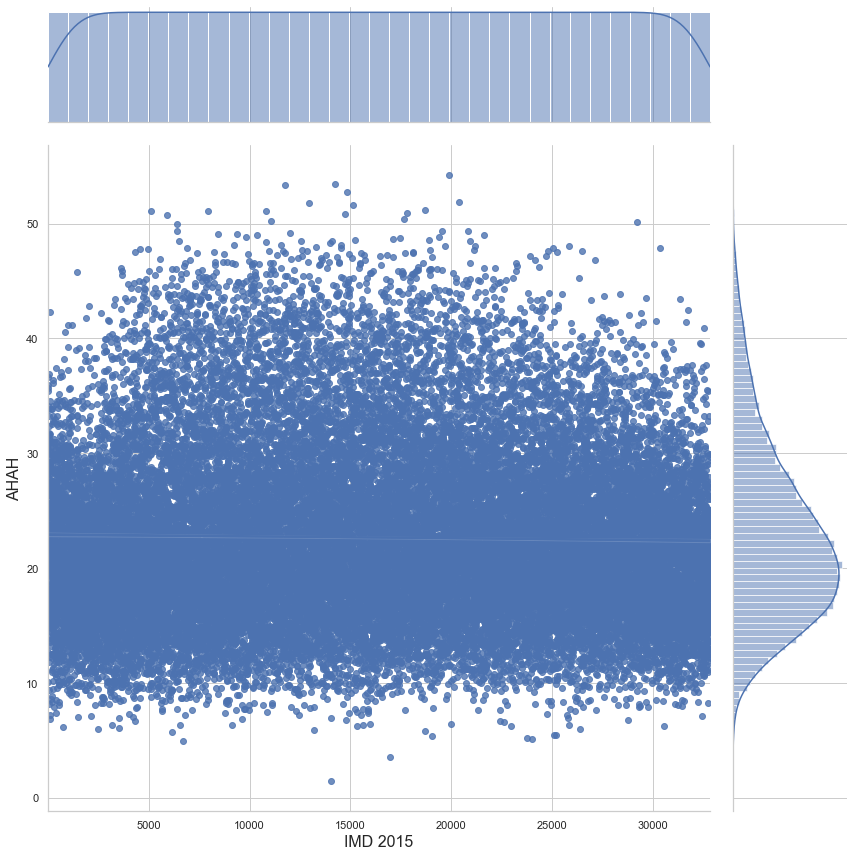

In [34]:
sns.set_style("whitegrid")
#sns.set(font_scale = 1.3)
ax = sns.jointplot(y='AHAH', x = 'IMD Rank 2019', data=df, kind='reg', height=12)
ax.set_axis_labels(ylabel='AHAH', xlabel='IMD 2015', fontsize=16)
plt.show()

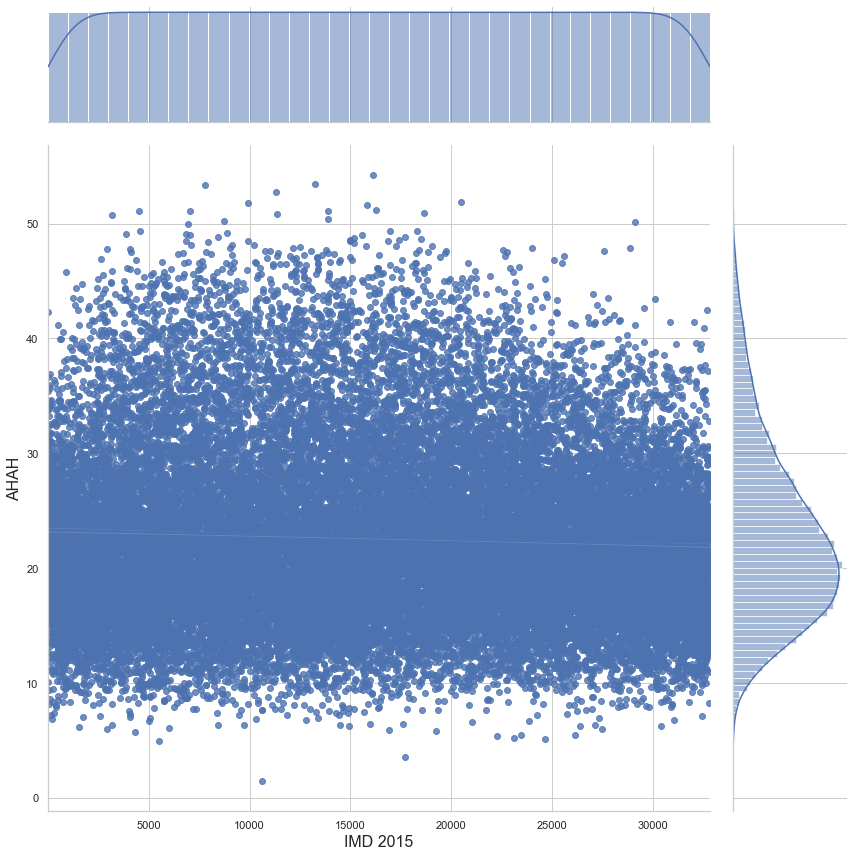

In [39]:
sns.set_style("whitegrid")
#sns.set(font_scale = 1.3)
ax = sns.jointplot(y='AHAH', x = 'IMD Rank 2015', data=df, kind='reg', height=12)
ax.set_axis_labels(ylabel='AHAH', xlabel='IMD 2015', fontsize=16)
plt.show()